# 🦋 Endangered Species Retriever

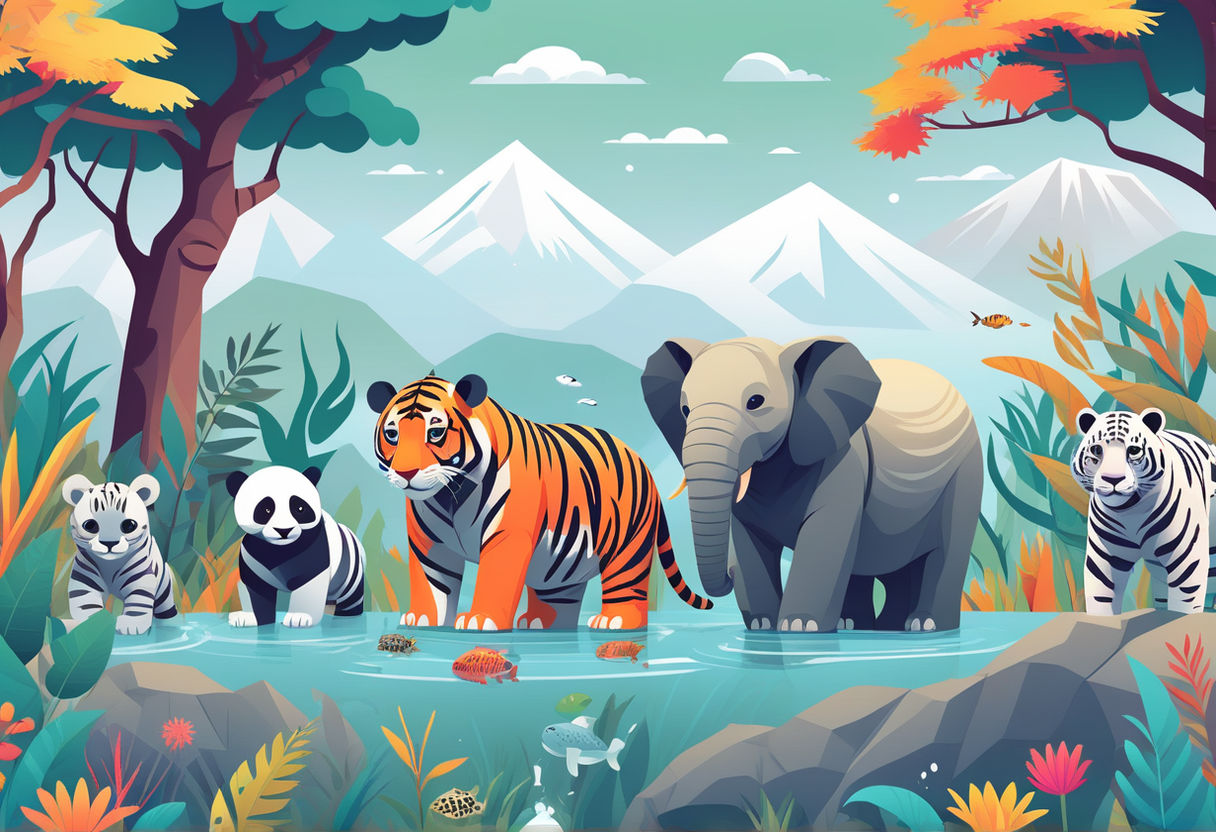

## Welcome to the **Endangered Species Retriever** notebook! 🌍

In this notebook, we focus on building a **retriever** using the Haystack framework, leveraging a dataset containing crucial information about various endangered species. The dataset includes key attributes such as:

- **Species Name**: The scientific name of the species 🐾
- **Common Name**: The name commonly used to refer to the species 🦒
- **Type**: The category of the species (e.g., Plant, Mammal, Reptile) 🌿
- **Location(s)**: The geographic areas where the species can be found 📍
- **Estimated Population**: An estimate of the species' population size 📊
- **Threats**: The challenges and threats that endanger the species ⚠️

## 🎯 Objective

The primary objective of this analysis is to build a **retriever** that can efficiently query our dataset to extract relevant information about endangered species based on user queries. 

### Steps We Will Follow:

1. **Data Preparation**: We will load the dataset and format it into documents suitable for the retriever.
2. **Retriever Implementation**: Using the **Haystack** framework, we will create an in-memory document store and implement a retriever.
3. **Querying**: We will perform various queries on the dataset to retrieve information based on user input.

## 🌱 Get Involved!

Feel free to run the code, explore the dataset, and experiment with different queries to see how well the retriever performs! Together, we can enhance our understanding of endangered species and contribute to their conservation! 💚

---


In [1]:
!pip install haystack-ai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 16.0 MB/s eta 0:00:00


In [2]:
import pandas as pd

# Load the dataset (update the path as necessary)
df = pd.read_csv('/kaggle/input/endangered-species/Species.csv')

# Check the first few rows of the dataframe
print(df.head())


   Unnamed: 0               Species Name            Common Name          Type  \
0           0        Abies beshanzuensis            Baishan fir  Plant (Tree)   
1           1            Actinote zikani                      -        Insect   
2           2      Aipysurus foliosquama  Leaf scaled sea-snake       Reptile   
3           3    Amanipodagrion gilliesi         Amani flatwing        Insect   
4           4  Antisolabis seychellensis                      -        Insect   

                                       Location(s)  Estimated Population  \
0              Baishanzu Mountain, Zhejiang, China  5 mature individuals   
1          Near São Paulo, Atlantic forest, Brazil               Unknown   
2        Ashmore Reef and Hibernia Reef, Timor Sea               Unknown   
3  Amani-Sigi Forest, Usambara Mountains, Tanzania     < 500 individuals   
4             Morne Blanc, Mahé island, Seychelles               Unknown   

                                             Threats  
0

In [3]:
documents = []
for index, row in df.iterrows():
    documents.append(Document(
        content=f"Species Name: {row['Species Name']}, Common Name: {row['Common Name']}, "
                f"Type: {row['Type']}, Location: {row['Location(s)']}, "
                f"Population: {row['Estimated Population']}, Threats: {row['Threats']}",
        meta={"species_name": row['Species Name'], "common_name": row['Common Name'], "location":row['Location(s)']}
    ))

    
    print(documents)

NameError: name 'Document' is not defined

In [ ]:
df.head()

## Set up memory store and retriever

In [ ]:
from haystack import Document
from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.retrievers.in_memory import InMemoryBM25Retriever


document_store = InMemoryDocumentStore(bm25_algorithm="BM25Plus")
document_store.write_documents(documents=documents)

## create Query Pipeline

In [ ]:
from haystack import Pipeline

pipeline = Pipeline()
pipeline.add_component(instance=InMemoryBM25Retriever(document_store=document_store), name="retriever")

## Query

In [ ]:
query = "How many insects of type AMani fkatwing are still exisitng?"
pipeline.run(data={"retriever": {"query": query, "filters": {"field": "meta.common_name", "operator": "==", "value": "Amani flatwing"}}})